### Getting deeper with Keras

Tensorflow is a powerful and flexible tool, but coding large neural architectures with it is tedious. To speed things up, there's plenty of deep learning toolkits that work on top of it like Slim, TFLearn, Sonnet, Keras.

We'll be mostly focusing on Keras as it can be used both as auxiliary interface to TensorFlow and as standalone high-level library. We'll get you through on both of these in no time.

In [7]:
import numpy as np
from mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
y_train,y_val,y_test = map(keras.utils.np_utils.to_categorical,[y_train,y_val,y_test])

ImportError: cannot import name 'load_dataset'

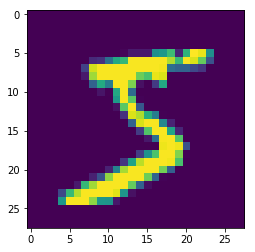

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0,0]);

## The pretty keras

The high-level Keras interface lets you define deep learning architectures from high-level building blocks like "Dense layer with nonlinearity", "dropout" or "batch normalization". Keras even takes the responsibility to handle dropouts correctly when evaluating.

This is convenient if you're building something commonplace like an image classifier. More delicate matters like sharing weight matrices or adversarial training (later) will get hacky.

In [72]:
import keras
from keras.models import Sequential
import keras.layers as ll

model = Sequential(name="cnn")

model.add(ll.InputLayer([1,28,28]))

model.add(ll.Flatten())

#network body
model.add(ll.Dense(25))
model.add(ll.Activation('linear'))

model.add(ll.Dropout(0.9))

model.add(ll.Dense(25))
model.add(ll.Activation('linear'))

#output layer: 10 neurons for each class with softmax
model.add(ll.Dense(10,activation='softmax'))

model.compile("adam","categorical_crossentropy",metrics=["accuracy"])


In [73]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        (None, 1, 28, 28)         0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 25)                19625     
_________________________________________________________________
activation_15 (Activation)   (None, 25)                0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_40 (Dense)             (None, 25)                650       
_________________________________________________________________
activation_16 (Activation)   (None, 25)                0         
__________

### Model interface

Keras models follow __Scikit-learn__'s interface of fit/predict with some notable extensions. Let's take a tour.

In [74]:
#fit(X,y) with a neat automatic logging. Highly customizable under the hood.
model.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=5)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 9s - loss: 1.6245 - acc: 0.3765 - val_loss: 0.6873 - val_acc: 0.8686

In [78]:
#estimate probabilities P(y|x)
model.predict_proba(X_val[:2])

2/2 [==============================] - 0s


array([[  2.56770216e-02,   9.13105458e-02,   2.24638447e-01,
          4.88387078e-01,   7.55845627e-04,   6.60294741e-02,
          7.21476832e-03,   6.21573243e-04,   9.48510617e-02,
          5.14186511e-04],
       [  1.19884489e-02,   2.83300001e-02,   2.33803391e-02,
          7.13192523e-02,   9.94687155e-03,   1.88033178e-01,
          5.06469607e-03,   1.52799301e-03,   6.55243516e-01,
          5.16568637e-03]], dtype=float32)

In [67]:
#Save trained weights
model.save("weights.h5")

In [85]:
print("\nLoss, Accuracy = ",model.evaluate(X_test,y_test))

 9952/10000 [============================>.] - ETA: 0s

### Whoops!
So far our model is staggeringly inefficient. It didn't even beat the linear model (val_acc ~0.92). Guess, why?

There's an error that causes your model to underfit, and another error that prevents it from learning nonlinear dependencies. Try fixing both and play with the network architecture until you beat the thresholds below.

In [86]:
# Test score...
test_predictions = model.predict_proba(X_test).argmax(axis=-1)
test_answers = y_test.argmax(axis=-1)

test_accuracy = np.mean(test_predictions==test_answers)

print("\nTest accuracy: {} %".format(test_accuracy*100))

assert test_accuracy>=0.92,"Logistic regression can do better!"
assert test_accuracy>=0.975,"Your network can do better!"
print("Great job!")

 9440/10000 [===========================>..] - ETA: 0s
Test accuracy: 87.64 %


AssertionError: Logistic regression can do better!

## Keras + tensorboard

Remember the interactive graphs from Tensorboard one notebook ago? 

Thing is, Keras can use tensorboard to show you a lot of useful information about the learning progress. Just take a look!

In [63]:
model = Sequential(name="cnn")

model.add(ll.InputLayer([1,28,28]))
model.add(ll.Flatten())

<Your architecture here>

#output layer: 10 neurons for each class with softmax
model.add(ll.Dense(10,activation='softmax'))

model.compile("adam","categorical_crossentropy",metrics=["accuracy"])


In [64]:
from keras.callbacks import TensorBoard
model.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=10,
          callbacks=[TensorBoard("./logs")])

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 19s - loss: 0.3225 - acc: 0.9072 - val_loss: 0.1859 - val_acc: 0.9481

Now launch tensorboard with the appropriate logdir:

__```tensorboard --port=7007 --logdir=./logs```__